In [87]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import re
pd.set_option('display.max_colwidth', -1)
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [64]:
# read the data from drive
df = pd.read_json('News_Category_Dataset_v2.json', lines=True)
df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment."""


In [65]:
# descriptive analysis of the dataset
df.describe().T

,count,unique,top,freq,first,last
authors,200853,27993,,36620,NaN,NaN
category,200853,41,POLITICS,32739,NaN,NaN
date,200853,2309,2013-01-17 00:00:00,100,2012-01-28 00:00:00,2018-05-26 00:00:00
headline,200853,199344,Sunday Roundup,90,NaN,NaN
link,200853,200812,https://www.huffingtonpost.comhttp://stylelikeu.com/closets/megan-lecrone/,2,NaN,NaN
short_description,200853,178353,,19712,NaN,NaN


 The dataset timeline starts at 28-01-2012 and ends at 26-05-2018

In [97]:
df.drop_duplicates(inplace=True)

In [66]:
# check for missing values if any
df.isna().sum()

authors              0
category             0
date                 0
headline             0
link                 0
short_description    0
dtype: int64

In [582]:
df1 = df.copy()
df1.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment."""


In [586]:
# df1.aut_name + ' ' + 
df1['text'] = (df1.headline + ' ' + df1.short_description)
df1 = df1[(df1.text != ' ') | (df1.text != '')]

In [587]:
# Removing Punctuation
df1['text'] = df1['text'].str.replace('[^\w\s]','')

In [588]:
df1.text = [x.lower() for x in df1.text]

In [644]:
df1.category[df1.category=='THE WORLDPOST'] = 'WORLDPOST'
df1.category[df1.category=='GREEN'] = 'ENVIRONMENT'
df1.category[df1.category=='CULTURE & ARTS'] = 'ARTS'
df1.category[df1.category=='COMEDY'] = 'ENTERTAINMENT'
df1.category[(df1.category=='BLACK VOICES') | (df1.category=='LATINO VOICES') | (df1.category=='QUEER VOICES')] = 'VOICES'
df1.category[df1.category=='STYLE'] = 'STYLE & BEAUTY'
df1.category[df1.category=='ARTS & CULTURE'] = 'ARTS'
df1.category[df1.category=='COLLEGE'] = 'EDUCATION'
df1.category[df1.category=='SCIENCE'] = 'TECH'
df1.category[df1.category=='WEDDINGS'] = 'GOOD NEWS'
df1.category[df1.category=='TASTE'] = 'FOOD & DRINK'
df1.category[(df1.category=='PARENTING') | (df1.category=='FIFTY')] = 'PARENTS'
df1.category[df1.category=='WORLD NEWS'] = 'WORLDPOST'


In [589]:
df1.head()

,authors,category,date,headline,link,short_description,aut_name,text
0,Melissa Jeltsen,CRIME,2018-05-26,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,Melissa Jeltsen,there were 2 mass shootings in texas last week but only 1 on tv she left her husband he killed their children just another day in america
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,Andy McDonald,will smith joins diplo and nicky jam for the 2018 world cups official song of course it has a song
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,Ron Dicker,hugh grant marries for the first time at age 57 the actor and his longtime girlfriend anna eberstein tied the knot in a civil ceremony
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,Ron Dicker,jim carrey blasts castrato adam schiff and democrats in new artwork the actor gives dems an asskicking for not fighting hard enough against donald trump
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",Ron Dicker,julianna margulies uses donald trump poop bags to pick up after her dog the dietland actress said using the bags is a really cathartic therapeutic moment


## EDA

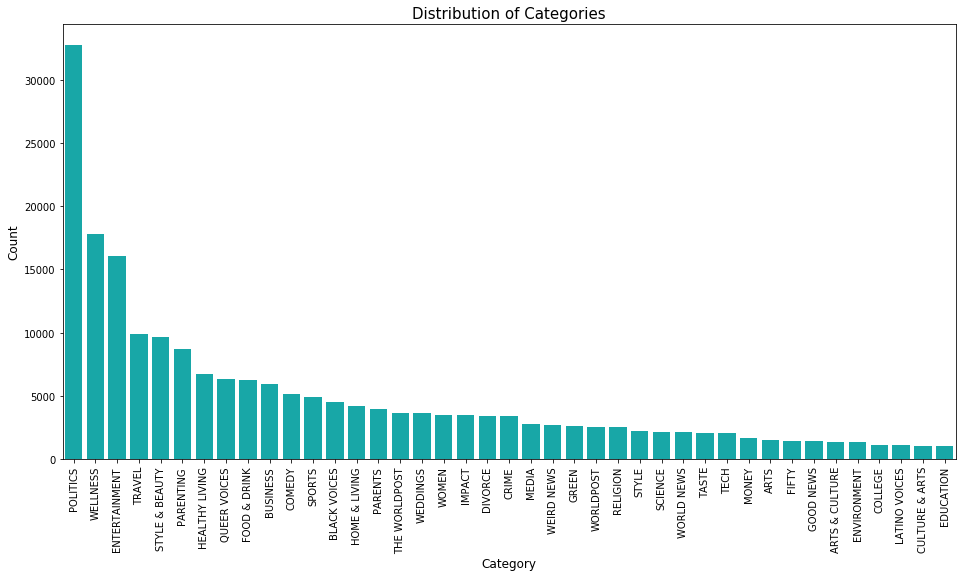

In [584]:
# distribution of categories in dataset
plt.figure(figsize=(16,8))
sns.countplot(df1.category, order=df1.category.value_counts().index, color='c')
plt.xticks(rotation=90)
plt.xlabel('Category',fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Categories', fontsize=15)
plt.show()

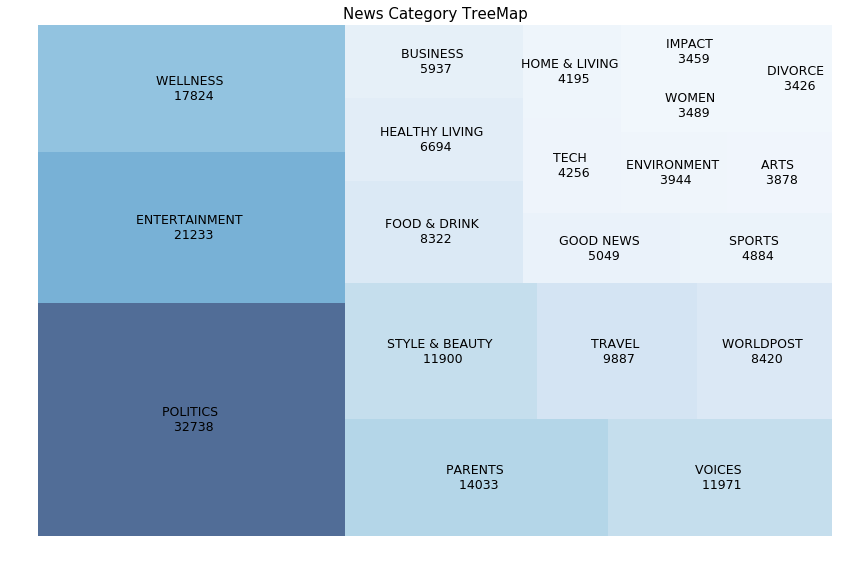

In [651]:
#Popular category per month
# a = df1.groupby(pd.Grouper(key='date', freq='M'))['category'].agg(lambda x:x.value_counts().index[0])
a = df1.category.value_counts()

import squarify
import matplotlib

MEDIUM_SIZE = 12.5
BIGGER_SIZE = 23

plt.rc('font', size=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)
# #Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.

norm = matplotlib.colors.Normalize(vmin=a.values.min(), vmax=a.values.max())
colors = [matplotlib.cm.Blues(norm(value)) for value in a.values]

lbl= np.array(a.index)+ " \n " + a.values.astype("str")

plt.figure(figsize=(12,8))
squarify.plot(sizes=a.values[:20], label=lbl[0:20], alpha=0.7, color=colors)
plt.axis('off')
plt.title("News Category TreeMap")
plt.tight_layout()
plt.show()



In [ ]:
all_words = ' '.join([text for text in df1['text']])

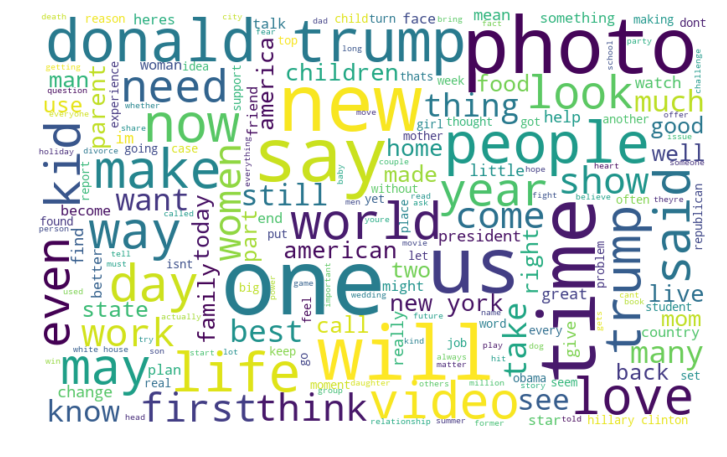

In [653]:
from wordcloud import WordCloud

plt.figure(figsize=(12,10))
wordcloud = WordCloud(width=800, height=500, random_state=21, 
                      max_font_size=110, background_color='white').generate(all_words)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [609]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

### Count Vectorizer

In [591]:
vect = CountVectorizer(min_df=5, stop_words='english')
X = vect.fit_transform(df1.text)

In [592]:
le = LabelEncoder()
y = le.fit_transform(df1.category)

In [593]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

### Naive Bayes

In [594]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

Wall time: 480 ms


In [595]:
y_pred = nb.predict(X_test)
print(f'train score: {nb.score(X_train, y_train):.4f}')
print(f'test score: {nb.score(X_test, y_test):.4f}')

train score: 0.6918
test score: 0.5865


In [525]:
print('KAPPA SCORE: ',cohen_kappa_score(y_test,y_pred))

KAPPA SCORE:  0.6120621373109352


### GridSearchCV

In [526]:
def predict_cat(title):
    stop = stopwords.words('english')
    if title:
        title = title.replace('[^\w\s]','')
        title = ' '.join(x for x in  title.split(' ') if x not in stop)
        cod = nb.predict(vect.transform([title]))
        return le.inverse_transform(cod)[0]
    else:
        print('text cannot be blank')


In [608]:
predict_cat("India’s largest ever ‘eye in the sky’ will take on its neighbours")

'TRAVEL'

### SVM

In [25]:
%%time
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

Wall time: 3h 13min 18s


In [26]:
y_pred = svc.predict(X_test)
print(f'train score: {svc.score(X_train, y_train):.4f}')
print(f'test score: {svc.score(X_test, y_test):.4f}')

train score: 0.9800
test score: 0.6159


### Logistic Regression

In [395]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


Wall time: 10min 21s


In [398]:
y_pred_logreg = logreg.predict(X_test)
print(f'train score: {logreg.score(X_train, y_train):.4f}')
print(f'test score: {logreg.score(X_test, y_test):.4f}')

train score: 0.9015
test score: 0.6096
Wall time: 425 ms


In [216]:
print('KAPPA SCORE: ',cohen_kappa_score(y_test,y_pred_logreg))

KAPPA SCORE:  0.6874926108106882


### TF-IDF Vectorizer

In [205]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df1.text)

In [206]:
le = LabelEncoder()
y = le.fit_transform(df1.category)

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

### Naive Bayes with TF-IDF Vectorizer

In [208]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)

Wall time: 802 ms


In [209]:
%%time
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)y_pred = svc.predict(X_test)
print(f'train score: {svc.score(X_train, y_train):.4f}')
print(f'test score: {svc.score(X_test, y_test):.4f}')y_pred_tfidf = nb_tfidf.predict(X_test)
nb_tfidf.score(X_test, y_test)

0.42809489432675313

In [210]:
print('KAPPA SCORE: ',cohen_kappa_score(y_test,y_pred_tfidf))

KAPPA SCORE:  0.352806424982715
